# LASSO REGULARIZATION
- IS A REGULARIZATION TECHINQUE THAT IS USED FOR FEATURE SELECTION USING SHRINKAGE METHOD ALSO REFERRED AS PENALIZED REGRESSION METHOD 


-EQUATION
-COST FUNCTION = LOSS +LAMBDA (SUM(MODE(MODE(W))))

# RIDGE REGULARIZATION

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [38]:
dataset = pd.read_csv("Houseprice.csv")
dataset.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,3,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,313000.0
1,5,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,2384000.0
2,3,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,342000.0


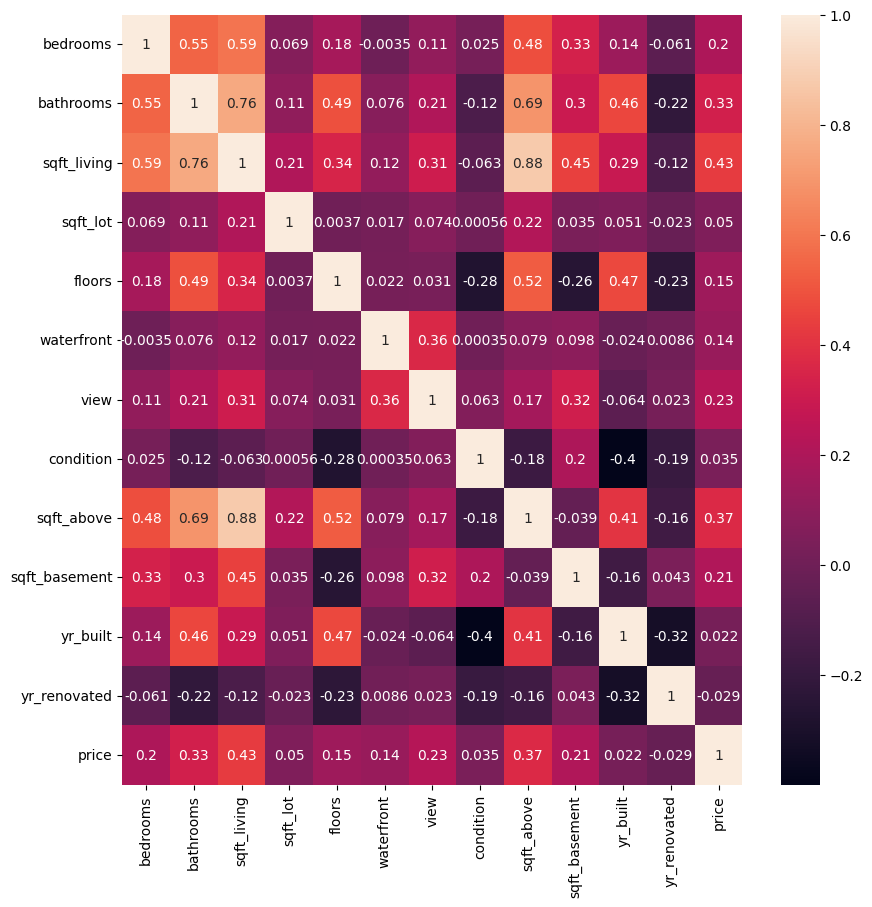

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [40]:
x=dataset.iloc[:,:-1]
y=dataset["price"]

In [41]:
sc=StandardScaler()
sc.fit(x)

StandardScaler()

In [42]:
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np # since we cannot direvtly find RMSE

# Linear Regression

In [46]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100

3.213614574821666

In [47]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

987072409461.0598
211180.3307172119
993515.1782741217


In [48]:
lr.coef_

array([-5.76425574e+04,  2.78827816e+04,  1.70252909e+18, -1.84041826e+04,
        3.66023084e+04,  3.23189826e+04,  3.49777586e+04,  2.04449767e+04,
       -1.52393815e+18, -8.20391882e+17, -7.68670300e+04,  8.41609295e+03])

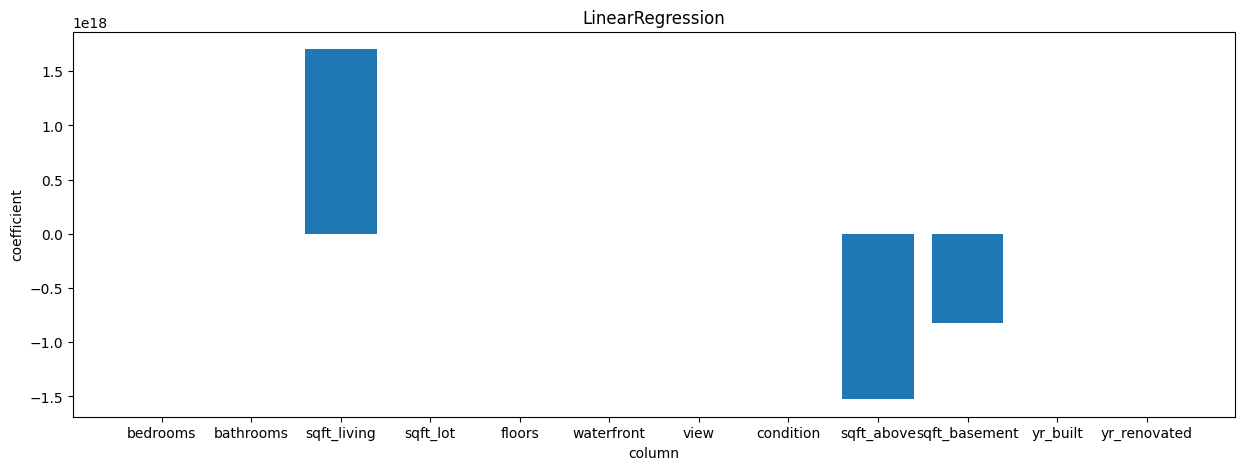

In [49]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,lr.coef_)
plt.title("LinearRegression")
plt.xlabel("column")
plt.ylabel("coefficient")
plt.show()

# Lasso

In [50]:
la=Lasso(alpha=10)
la.fit(x_train,y_train)
la.score(x_test,y_test)*100

C:\Users\celia\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.092e+12, tolerance: 5.229e+10
  model = cd_fast.enet_coordinate_descent(


3.228393758780601

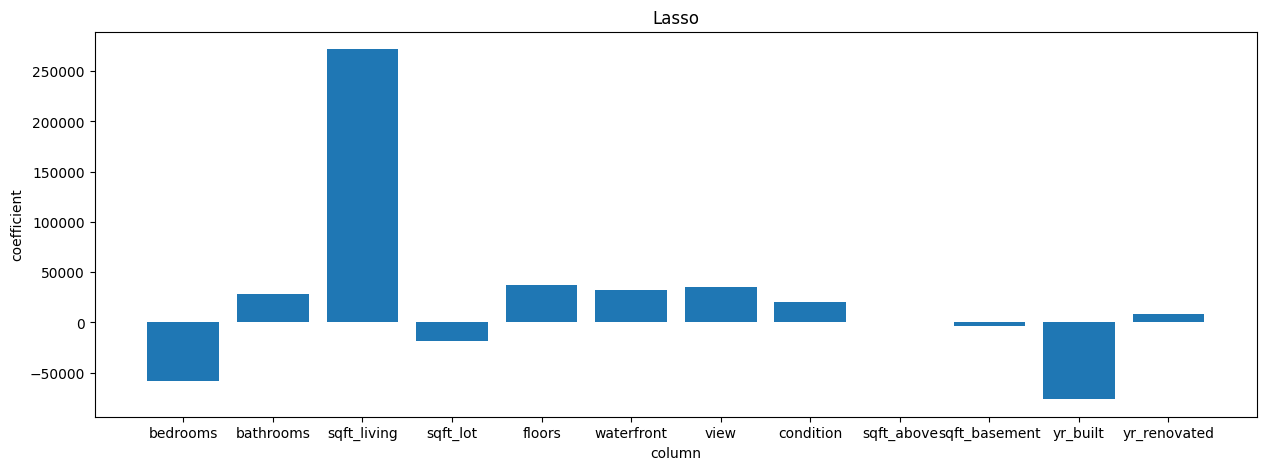

In [51]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,la.coef_)
plt.title("Lasso")
plt.xlabel("column")
plt.ylabel("coefficient")
plt.show()

In [52]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

987072409461.0598
211180.3307172119
993515.1782741217


# Ridge

In [53]:
rd=Ridge(alpha=10)
rd.fit(x_train,y_train)
rd.score(x_test,y_test)*100

3.24019941712842

In [54]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

987072409461.0598
211180.3307172119
993515.1782741217


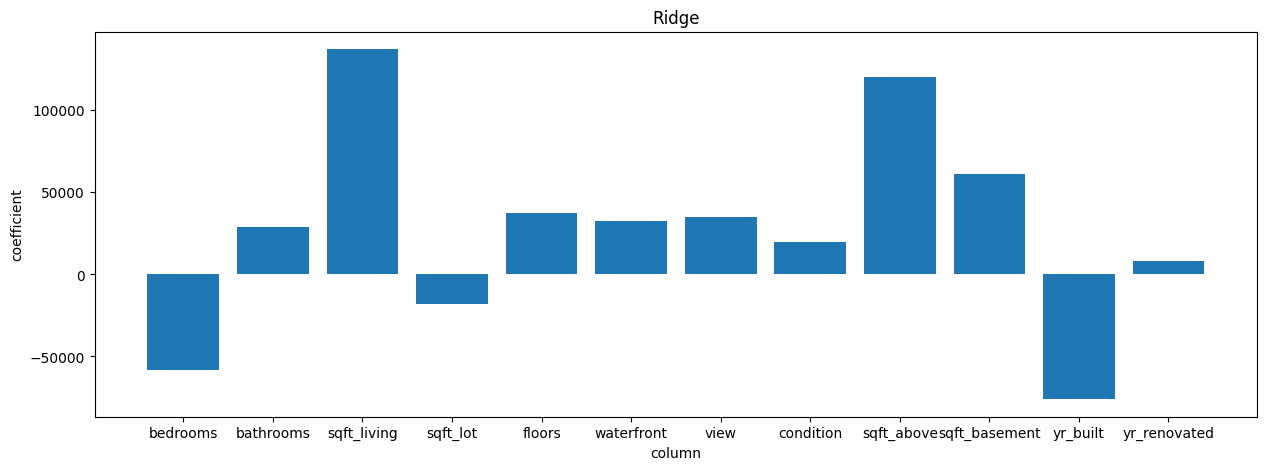

In [55]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,rd.coef_)
plt.title("Ridge")
plt.xlabel("column")
plt.ylabel("coefficient")
plt.show()

- Compare using coefficent

In [56]:
# for that we have to create dataframe
df=pd.DataFrame({"col_name":x.columns,"LinearRegression":lr.coef_,"Lasso":la.coef_,"Ridge":rd.coef_})
df

,col_name,LinearRegression,Lasso,Ridge
0,bedrooms,-5.764256e+04,-58587.834055,-58006.052994
1,bathrooms,2.788278e+04,28585.481411,28878.686086
2,sqft_living,1.702529e+18,271938.930225,137085.109644
3,sqft_lot,-1.840418e+04,-18443.642252,-18298.877275
4,floors,3.660231e+04,37581.039634,37445.130830
5,waterfront,3.231898e+04,32271.977116,32264.182806
6,view,3.497776e+04,34830.156610,34968.321859
7,condition,2.044498e+04,19847.642471,19870.905664
8,sqft_above,-1.523938e+18,466.208981,120223.632684
9,sqft_basement,-8.203919e+17,-3283.197129,61163.461025
